In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter, defaultdict
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('network_backup_dataset.csv')

In [3]:
dataset.columns

Index(['Week #', 'Day of Week', 'Backup Start Time - Hour of Day',
       'Work-Flow-ID', 'File Name', 'Size of Backup (GB)',
       'Backup Time (hour)'],
      dtype='object')

In [4]:
def getX_Y_from_dataset(dataset):
    Y = (dataset['Size of Backup (GB)'].as_matrix())
    X = dataset.drop(['Size of Backup (GB)'],axis=1)
    return X,Y

In [5]:
def one_hot_encode(dataset):
    le = preprocessing.LabelEncoder()
    dataset_cat = dataset.select_dtypes(include=[object])
    dataset_cat.head()
    dataset_cat = dataset_cat.apply(le.fit_transform)
    oh_enc = preprocessing.OneHotEncoder()
    oh_enc.fit(dataset_cat)
    onehotlabels = oh_enc.transform(dataset_cat)
    cat_array = onehotlabels.toarray()
    dataset_no_cat = dataset.select_dtypes(exclude=[object])
    non_cat_array = dataset_no_cat.as_matrix()
    return np.concatenate((non_cat_array,cat_array),axis = 1)
    

In [10]:
def perform_10fold(X,y,regressor):
    kf = KFold(n_splits=10,random_state = 0)
    i = 1
    tr_l = []
    ts_l = []
    bestModel = None
    min_ts_e = 10
    for train_index, test_index in kf.split(X):
        print("Fold : ",i)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        regressor.fit(X_train,y_train)
        train_preds = regressor.predict(X_train)
        test_preds = regressor.predict(X_test)
        tr_e = np.sqrt(mean_squared_error(y_train,train_preds))
        tr_l.append(tr_e)
        ts_e = np.sqrt(mean_squared_error(y_test,test_preds))
        ts_l.append(ts_e)
        if(ts_e<min_ts_e):
            min_ts_e = ts_e
            bestModel = regressor
        #print("Training RMSE : ",np.sqrt(mean_squared_error(y_train,train_preds)))
        #print("Test RMSE : ",np.sqrt(mean_squared_error(y_test,test_preds)))
        i = i+1
    return tr_l,ts_l, bestModel

In [11]:
X,Y= getX_Y_from_dataset(dataset)

In [12]:
X =one_hot_encode(X)

In [13]:
train_map = defaultdict(list)
test_map = defaultdict(list)
for activation_ in ['identity', 'logistic', 'tanh', 'relu']:
    for hidden_size in range(1,100,5):
        print('size_',hidden_size,'activation function:',activation_)
        mlp_reg = MLPRegressor(hidden_layer_sizes=hidden_size,activation=activation_)
        train_rmses,test_rmses,m=perform_10fold(X,Y,mlp_reg)
        print(np.mean(train_rmses),np.mean(test_rmses))
        train_map[activation_].append(np.mean(train_rmses))
        test_map[activation_].append(np.mean(test_rmses))
        
        
        
        
        
    

size_ 1 activation function: identity
Fold :  1
Fold :  2
Fold :  3
Fold :  4
Fold :  5
Fold :  6
Fold :  7
Fold :  8
Fold :  9
Fold :  10
0.0730068593916 0.0729713903724
size_ 6 activation function: identity
Fold :  1
Fold :  2
Fold :  3
Fold :  4
Fold :  5
Fold :  6
Fold :  7
Fold :  8
Fold :  9
Fold :  10
0.0715470968772 0.0715974354859
size_ 11 activation function: identity
Fold :  1
Fold :  2
Fold :  3
Fold :  4
Fold :  5
Fold :  6
Fold :  7
Fold :  8
Fold :  9
Fold :  10
0.0714679573704 0.0715220321332
size_ 16 activation function: identity
Fold :  1
Fold :  2
Fold :  3
Fold :  4
Fold :  5
Fold :  6
Fold :  7
Fold :  8
Fold :  9
Fold :  10
0.0715897838636 0.0717564583571
size_ 21 activation function: identity
Fold :  1
Fold :  2
Fold :  3
Fold :  4
Fold :  5
Fold :  6
Fold :  7
Fold :  8
Fold :  9
Fold :  10
0.0716007308012 0.071623472098
size_ 26 activation function: identity
Fold :  1
Fold :  2
Fold :  3
Fold :  4
Fold :  5
Fold :  6
Fold :  7
Fold :  8
Fold :  9
Fold :  10
0.0

Fold :  2
Fold :  3
Fold :  4
Fold :  5
Fold :  6
Fold :  7
Fold :  8
Fold :  9
Fold :  10
0.0481233686756 0.0520782086482
size_ 46 activation function: tanh
Fold :  1
Fold :  2
Fold :  3
Fold :  4
Fold :  5
Fold :  6
Fold :  7
Fold :  8
Fold :  9
Fold :  10
0.0485720594299 0.0532291501565
size_ 51 activation function: tanh
Fold :  1
Fold :  2
Fold :  3
Fold :  4
Fold :  5
Fold :  6
Fold :  7
Fold :  8
Fold :  9
Fold :  10
0.0453811208213 0.0499748552012
size_ 56 activation function: tanh
Fold :  1
Fold :  2
Fold :  3
Fold :  4
Fold :  5
Fold :  6
Fold :  7
Fold :  8
Fold :  9
Fold :  10
0.04672219727 0.0491716084685
size_ 61 activation function: tanh
Fold :  1
Fold :  2
Fold :  3
Fold :  4
Fold :  5
Fold :  6
Fold :  7
Fold :  8
Fold :  9
Fold :  10
0.0483961417496 0.0517983136721
size_ 66 activation function: tanh
Fold :  1
Fold :  2
Fold :  3
Fold :  4
Fold :  5
Fold :  6
Fold :  7
Fold :  8
Fold :  9
Fold :  10
0.0446987642885 0.0474642898408
size_ 71 activation function: tanh
Fold

In [ ]:
train_rmses,test_rmses=perform_10fold(X,Y,mlp_reg)

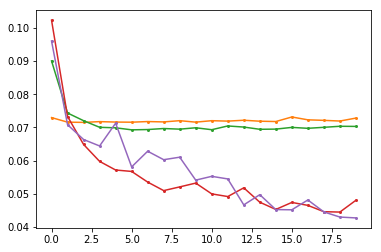

In [22]:
for algo in test_map:
    plt.plot(test_map[algo], label = 'aa', marker='.',markersize=4,)
plt.show()